In [78]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# Read in files
file = "portal_demog.csv"
file2 = "portal_ref_demog_sexuality.csv"
file3 = "portal_ref_demog_gender.csv"
file4 = "portal_ref_demog_age.csv"

In [104]:
data = pd.read_csv(file)
data.head()

,Response ID,country,state_province,age,gender,marital,sexuality,children,income,education
0,139,1,6,3,2,3,3,0,6,3
1,157,1,6,9,1,3,1,1,2,3
2,157000,1,6,9,1,3,1,1,2,3
3,174,1,5,3,2,3,1,2,5,6
4,177,1,6,4,1,1,1,0,6,2


In [81]:
data2 = pd.read_csv(file2)
data2.head()

,demog_id,demog_name
0,1,Heterosexual or straight
1,2,Homosexual
2,3,Bisexual
3,4,Other
4,5,I prefer not to say


In [105]:
data3 = pd.read_csv(file3)
data3.head()

,demog_gender_id,demog_gender_name
0,1,Male
1,2,Female
2,3,Other


In [110]:
data4 = pd.read_csv(file4)
data4.head()

,demog_age_id,demog_age_name,demog_age_group
0,1,Under 18,Generation Z
1,2,18-20,Generation Z
2,3,21-25,Millenials
3,4,26-30,Millenials
4,5,31-35,Millenials


In [82]:
# Group sexuality based on reference number

heterosexual = data[data["sexuality"] == 1]
homosexual = data[data["sexuality"] == 2]
bisexual = data[data["sexuality"] == 3]
other = data[data["sexuality"] == 4]
prefer_not_to_say = data[data["sexuality"] == 5]

In [86]:
# Create sexuality dataframe
sexuality_table = pd.DataFrame({"Heterosexual": [len(heterosexual)],
                              "Homosexual": [len(homosexual)],
                                "Bisexual": [len(bisexual)],
                                "Other": [len(other)],
                                "Prefer Not To Say": [len(prefer_not_to_say)]
                              })

sexuality_table

,Heterosexual,Homosexual,Bisexual,Other,Prefer Not To Say
0,221,22,12,1,0


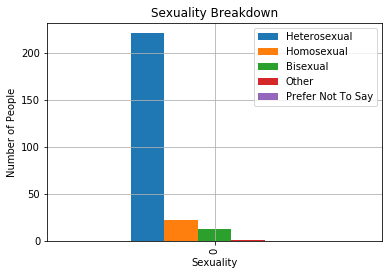

In [102]:
# Create Sexuality Breakdown Graph
sexuality_table.plot.bar()
plt.title("Sexuality Breakdown")
plt.ylabel("Number of People")
plt.xlabel("Sexuality")
plt.grid(True)

plt.show()

# Most users are consider themselves to be heterosexual 

In [106]:
# Group sexuality based on reference number
male = data[data["gender"] == 1]
female = data[data["gender"] == 2]
other = data[data["gender"] == 3]

In [107]:
# Create gender dataframe
gender_table = pd.DataFrame({"Male": [len(heterosexual)],
                              "Female": [len(homosexual)],
                                "Other": [len(bisexual)]
                              })

gender_table

,Male,Female,Other
0,221,22,12


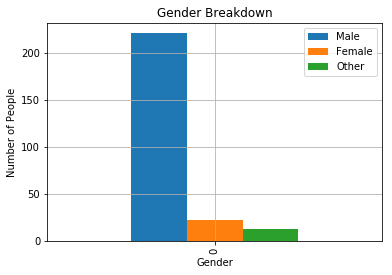

In [108]:
# Create Gender Breakdown graph
gender_table.plot.bar()
plt.title("Gender Breakdown")
plt.ylabel("Number of People")
plt.xlabel("Gender")
plt.grid(True)

plt.show()

# The majority of users are male

In [111]:
# Group generation data based on reference number

under18 = data[data["sexuality"] == 1]
_18_20= data[data["sexuality"] == 2]
_21_25 = data[data["sexuality"] == 3]
_26_30 = data[data["sexuality"] == 4]
_31_35 = data[data["sexuality"] == 5]
_36_40 = data[data["sexuality"] == 6]
_41_45 = data[data["sexuality"] == 7]
_46_55 = data[data["sexuality"] == 8]
_56_79 = data[data["sexuality"] == 9]
_80plus = data[data["sexuality"] == 10]


In [112]:
# Create sexuality dataframe
age_table = pd.DataFrame({"Under 18": [len(under18)],
                              "18-20": [len(_18_20)],
                                "21-25": [len(_21_25)],
                                "26-30": [len(_26_30)],
                                "31-35": [len(_31_35)],
                          "36-40": [len(_36_40)],
                          "41-45": [len(_41_45)],
                          "46-55": [len(_46_55)],
                          "56-79": [len(_56_79)],
                          "80 Plus": [len(_80plus)]
                              })

age_table

,Under 18,18-20,21-25,26-30,31-35,36-40,41-45,46-55,56-79,80 Plus
0,221,22,12,1,0,0,0,0,0,0


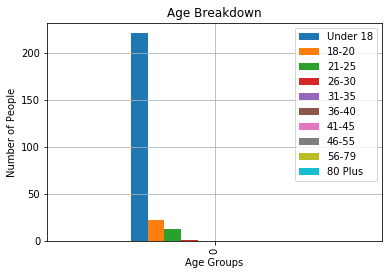

In [115]:
# Create Age Breakdown graph
age_table.plot.bar()
plt.title("Age Breakdown")
plt.ylabel("Number of People")
plt.xlabel("Age Groups")
plt.grid(True)

plt.show()

# This graph shows that the majority of users are under 18
# No users over the age of 30

In [ ]:
# the data set shows that the majority of users are heterosexual males under the age 18